<a href="https://colab.research.google.com/github/hossein20s/AnExample/blob/master/Test_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget bit.ly/initnotebook -O init.ipynb
%run init.ipynb

--2019-06-23 03:36:54--  http://bit.ly/initnotebook
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb [following]
--2019-06-23 03:36:54--  https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2560 (2.5K) [text/plain]
Saving to: ‘init.ipynb’

init.ipynb          100%[===================>]   2.50K  --.-KB/s    in 0s      

2019-06-23 03:36:54 (48.0 MB/s) - ‘init.ipynb’ saved [2560/2560]

Drive already mounted at /gdrive; to attempt to forcibly 

Using TensorFlow backend.


save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>
save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>


In [0]:
config_file = 'data/vital_signs_case01.yaml'
import yaml
with open(config_file, 'r') as stream:
  config = yaml.safe_load(stream)

locals().update(config)


In [17]:
DATA_FILE = SRC_DIR + 'case08.csv'
from datautil import data_reader

reader = data_reader(DATA_FILE,time_column=time_column, feature_column=feature_column, label_column=label_column, window_size=window_size)

X, Y = reader.get_whole()

reading data from file src/ramtin-duplicate/case08.csv
Raw data (2983, 54)
Dropna with selected columns (2793, 3)
before normalize:     RelativeTimeMilliseconds  Minute Volume  NBP (Mean)
0                     69000            0.0        82.0
1                     70000            0.0        82.0
after normalize:     RelativeTimeMilliseconds  Minute Volume  NBP (Mean)
0                 -0.495131      -0.566251    0.324496
1                 -0.494813      -0.566251    0.324496
processing sliding window
label_column: NBP (Mean)
feature_column: Minute Volume
Random shuffeling


In [15]:
from modelutil import load_model_yaml

model = load_model_yaml(CHECKPOINTS_DIR, model_name, epoch=400)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


load model from file checkpoints/model.lstmconv1D.yaml


W0623 04:04:40.004082 140573216671616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



loading weights from  checkpoints/model.lstmconv1D.epoch400.h5


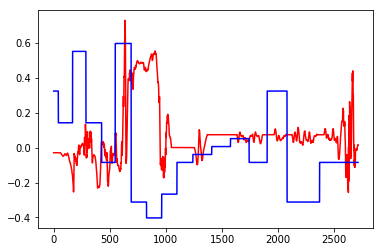

In [18]:
predicted = model.predict(X)

import matplotlib.pyplot as plt
plt.plot(predicted, 'r')
plt.plot(Y, 'b')
plt.show()